In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import smogn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.cluster import KMeans
import shap

In [2]:
below_50 = pd.read_csv("dataset/group_50_and_below.csv", low_memory=False)
dataset = below_50
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Columns: 102 entries, nomem_encr to work_impact_of_health
dtypes: float64(56), int64(46)
memory usage: 1.4 MB


In [3]:
# Checking missing values
dataset.replace(' ', np.nan, inplace=True)
print('Overall missing values: ', dataset.isnull().sum().sum())

Overall missing values:  0


In [5]:
# Checking datatypes
print(dataset.dtypes.to_string())

nomem_encr                              int64
swls_score                            float64
extraversion                          float64
agreeableness                         float64
conscientiousness                     float64
emotional_stability                   float64
intellect_imagination                 float64
leisure_time_satisfaction             float64
theatre                                 int64
cabaret                                 int64
dance_performance                       int64
classical_concert                       int64
opera                                   int64
musical                                 int64
pop_festival                            int64
house_party                             int64
museum                                  int64
art_gallery                             int64
library                                 int64
cinema                                  int64
film_event                              int64
food_event                        

## Feature Encoding

**Data type transformation**

In [6]:
# Converting to Categorical
dataset.gender = pd.Categorical(dataset.gender)
dataset.civil_status = pd.Categorical(dataset.civil_status)
dataset.domestic_situation = pd.Categorical(dataset.domestic_situation)

dataset.urbanization = pd.Categorical(dataset.urbanization)
dataset.occupation = pd.Categorical(dataset.occupation)
dataset.highest_education = pd.Categorical(dataset.highest_education, ordered=True)
dataset.origin = pd.Categorical(dataset.origin)

dataset.self_assessed_health = pd.Categorical(dataset.self_assessed_health, ordered=True)
dataset.long_standing_disease = pd.Categorical(dataset.long_standing_disease)
dataset.daily_impact_of_health = pd.Categorical(dataset.daily_impact_of_health, ordered=True)
dataset.social_impact_of_health = pd.Categorical(dataset.social_impact_of_health, ordered=True)
dataset.work_impact_of_health = pd.Categorical(dataset.work_impact_of_health, ordered=True)

print(dataset[['gender','civil_status','domestic_situation',
               'urbanization','occupation', 'highest_education', 'origin', 
               'self_assessed_health', 'long_standing_disease', 
               'daily_impact_of_health', 'social_impact_of_health', 'work_impact_of_health',
              ]].dtypes)

gender                     category
civil_status               category
domestic_situation         category
urbanization               category
occupation                 category
highest_education          category
origin                     category
self_assessed_health       category
long_standing_disease      category
daily_impact_of_health     category
social_impact_of_health    category
work_impact_of_health      category
dtype: object


In [7]:
dataset.head()

,nomem_encr,swls_score,extraversion,agreeableness,conscientiousness,emotional_stability,intellect_imagination,leisure_time_satisfaction,theatre,cabaret,...,urbanization,occupation,net_monthly_income,highest_education,origin,self_assessed_health,long_standing_disease,daily_impact_of_health,social_impact_of_health,work_impact_of_health
0,800002,29.0,-2.0,7.0,12.0,-7.0,15.0,6.0,0,1,...,4,1,7.0,4,0,4,2,1,2,2
1,800034,14.0,-7.0,19.0,15.0,-28.0,13.0,5.0,0,0,...,2,10,2.0,2,0,1,1,5,5,5
2,800127,5.0,3.0,25.0,17.0,-26.0,19.0,1.0,1,1,...,1,1,5.0,4,0,1,1,5,5,5
3,800156,31.0,13.0,12.0,14.0,-8.0,13.0,10.0,0,1,...,2,1,4.0,4,0,3,2,3,3,3
4,800201,22.0,13.0,11.0,16.0,-19.0,20.0,7.0,0,0,...,2,1,5.0,4,0,3,2,1,1,1


In [8]:
# to ordered categorical
dataset.theatre = pd.Categorical(dataset.theatre, ordered=True)
dataset.cabaret = pd.Categorical(dataset.cabaret, ordered=True)
dataset.dance_performance = pd.Categorical(dataset.dance_performance, ordered=True)
dataset.classical_concert = pd.Categorical(dataset.classical_concert, ordered=True)
dataset.opera = pd.Categorical(dataset.opera, ordered=True)
dataset.musical = pd.Categorical(dataset.musical, ordered=True)
dataset.pop_festival = pd.Categorical(dataset.pop_festival, ordered=True)
dataset.house_party = pd.Categorical(dataset.house_party, ordered=True)
dataset.museum = pd.Categorical(dataset.museum, ordered=True)
dataset.art_gallery = pd.Categorical(dataset.art_gallery, ordered=True)
dataset.library = pd.Categorical(dataset.library, ordered=True)
dataset.cinema = pd.Categorical(dataset.cinema, ordered=True)
dataset.film_event = pd.Categorical(dataset.film_event, ordered=True)
dataset.food_event = pd.Categorical(dataset.food_event, ordered=True)
dataset.fair = pd.Categorical(dataset.fair, ordered=True)
dataset.flea_market = pd.Categorical(dataset.flea_market, ordered=True)
dataset.zoo = pd.Categorical(dataset.zoo, ordered=True)
dataset.theme_park = pd.Categorical(dataset.theme_park, ordered=True)
dataset.holiday_within_the_Netherlands = pd.Categorical(dataset.holiday_within_the_Netherlands, ordered=True)
dataset.holiday_abroad = pd.Categorical(dataset.holiday_abroad, ordered=True)

# to ordered categorical
dataset.emptiness = pd.Categorical(dataset.emptiness, ordered=True)
dataset.people_to_count_on_when_misfortune = pd.Categorical(dataset.people_to_count_on_when_misfortune, ordered=True)
dataset.people_to_fully_rely_on = pd.Categorical(dataset.people_to_fully_rely_on, ordered=True)
dataset.closely_connected_people = pd.Categorical(dataset.closely_connected_people, ordered=True)
dataset.miss_having_people_around = pd.Categorical(dataset.miss_having_people_around, ordered=True)
dataset.feel_deserted = pd.Categorical(dataset.feel_deserted, ordered=True)

dataset.family_day = pd.Categorical(dataset.family_day, ordered=True)
dataset.neighborhood_day = pd.Categorical(dataset.neighborhood_day, ordered=True)
dataset.others_day = pd.Categorical(dataset.others_day, ordered=True)
dataset.family_evening = pd.Categorical(dataset.family_evening, ordered=True)
dataset.neighborhood_evening = pd.Categorical(dataset.neighborhood_evening, ordered=True)
dataset.others_evening = pd.Categorical(dataset.others_evening, ordered=True)

**Data Encoding**

In [ ]:
# Using Dummy Encoding to handle binary columns
binary_cols = ['long_standing_disease']
dataset = pd.get_dummies(dataset, columns=binary_cols, drop_first=True)

In [ ]:
categorical_cols = ['gender', 'civil_status', 'domestic_situation', 
                    'urbanization', 'occupation', 'origin']
dataset = pd.get_dummies(dataset, columns=categorical_cols)

In [13]:
# Using Label Encoding to handle ordered categories
label_encoder = LabelEncoder()
ordered_cols = ['highest_education', 
                'self_assessed_health', 
                'daily_impact_of_health', 'social_impact_of_health', 'work_impact_of_health',
                
                'theatre', 'cabaret', 'dance_performance', 'classical_concert', 'opera', 
                'musical', 'pop_festival', 'house_party', 'museum', 'art_gallery', 
                'library', 'cinema', 'film_event', 'food_event', 'fair', 
                'flea_market', 'zoo', 'theme_park', 'holiday_within_the_Netherlands', 'holiday_abroad',
               
                'emptiness', 'people_to_count_on_when_misfortune', 'people_to_fully_rely_on', 
                'closely_connected_people', 'miss_having_people_around', 'feel_deserted',
                'family_day', 'neighborhood_day', 'others_day', 
                'family_evening', 'neighborhood_evening', 'others_evening'
               ]
for col in ordered_cols:
    dataset[col] = label_encoder.fit_transform(dataset[col])

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Columns: 133 entries, nomem_encr to origin_202
dtypes: float64(94), int64(39)
memory usage: 1.8 MB


In [15]:
# Checking that the shapes all make sense
print(dataset.drop(columns=["swls_score"]).shape, dataset["swls_score"].shape)
print(dataset.shape)

(1776, 132) (1776,)
(1776, 133)


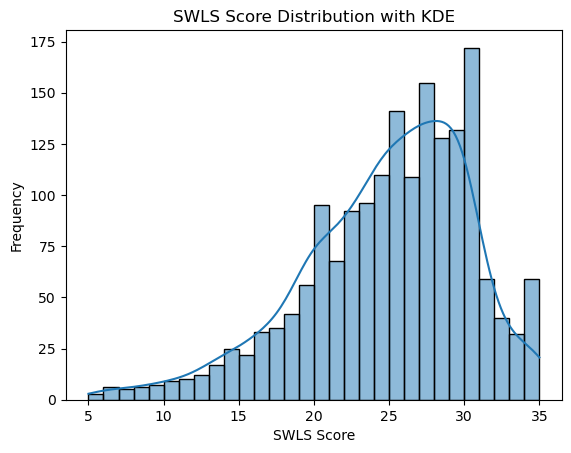

In [16]:
sns.histplot(dataset.swls_score, kde=True, bins=30)
plt.xlabel('SWLS Score')
plt.ylabel('Frequency')
plt.title('SWLS Score Distribution with KDE')
plt.show()

## Get Selected features

In [22]:
# **Selected features from previous step**
selected_features = ['extraversion', 'agreeableness', 'conscientiousness',
       'emotional_stability', 'intellect_imagination',
       'leisure_time_satisfaction', 'cabaret', 'opera', 'musical',
       'house_party', 'museum', 'art_gallery', 'cinema', 'food_event',
       'theme_park', 'holiday_within_the_Netherlands', 'holiday_abroad',
       'sports_hours', 'tv_time', 'podcast_time', 'audiobooks', 'books',
       'handicrafts', 'handwork', 'watching_at_home', 'equestrian_sport',
       'dining_out', 'music_radio', 'fishing', 'email',
       'searching_information', 'comparing_products', 'purchasing',
       'watching_online', 'downloading', 'gaming', 'reading_online',
       'other_online_activities', 'social_media_hours', 'chatting_hours',
       'forum_hours', 'social_contacts_satisfaction', 'emptiness',
       'people_to_fully_rely_on', 'closely_connected_people',
       'miss_having_people_around', 'feel_deserted', 'family_day',
       'neighborhood_day', 'others_day', 'family_evening', 'others_evening',
       'age', 'net_monthly_income', 'highest_education',
       'self_assessed_health', 'daily_impact_of_health',
       'social_impact_of_health', 'work_impact_of_health',
       'long_standing_disease_2', 'gender_1', 'civil_status_1',
       'civil_status_2', 'civil_status_3', 'domestic_situation_1',
       'domestic_situation_2', 'domestic_situation_3', 'urbanization_1',
       'occupation_4', 'occupation_10', 'occupation_12']
print(selected_features)

# **Filter the dataset to the selected features**
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


['extraversion', 'agreeableness', 'conscientiousness', 'emotional_stability', 'intellect_imagination', 'leisure_time_satisfaction', 'cabaret', 'opera', 'musical', 'house_party', 'museum', 'art_gallery', 'cinema', 'food_event', 'theme_park', 'holiday_within_the_Netherlands', 'holiday_abroad', 'sports_hours', 'tv_time', 'podcast_time', 'audiobooks', 'books', 'handicrafts', 'handwork', 'watching_at_home', 'equestrian_sport', 'dining_out', 'music_radio', 'fishing', 'email', 'searching_information', 'comparing_products', 'purchasing', 'watching_online', 'downloading', 'gaming', 'reading_online', 'other_online_activities', 'social_media_hours', 'chatting_hours', 'forum_hours', 'social_contacts_satisfaction', 'emptiness', 'people_to_fully_rely_on', 'closely_connected_people', 'miss_having_people_around', 'feel_deserted', 'family_day', 'neighborhood_day', 'others_day', 'family_evening', 'others_evening', 'age', 'net_monthly_income', 'highest_education', 'self_assessed_health', 'daily_impact_of

## Gradient Boosting with Hyperparameter Tuning and Feature Selection

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedKFold
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
import numpy as np

estimator = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Hyperparameter tuning with GridSearchCV
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)
grid_search = GridSearchCV(estimator, param_grid, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
grid_search.fit(X_train_selected, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [24]:

best_estimator = GradientBoostingRegressor(**best_params, random_state=42)
best_estimator.fit(X_train_selected, y_train)

# Train set estimation
train_r2 = r2_score(y_train, best_estimator.predict(X_train_selected))
train_mae = mean_absolute_error(y_train, best_estimator.predict(X_train_selected))
train_rmse = root_mean_squared_error(y_train, best_estimator.predict(X_train_selected))

# Test set estimation
test_r2 = r2_score(y_test, best_estimator.predict(X_test_selected))
test_mae = mean_absolute_error(y_test, best_estimator.predict(X_test_selected))
test_rmse = root_mean_squared_error(y_test, best_estimator.predict(X_test_selected))

print("\nGridSearchCV results:")
print(f"Best mean cross-validation R² score: {grid_search.best_score_}")

print("\nTraining R² Score:", train_r2)
print("Training MAE Score:", train_mae)
print("Training RMSE Score:", train_rmse)

print("\nTest R² Score:", test_r2)
print("Test MAE Score:", test_mae)
print("Test RMSE Score:", test_rmse)


GridSearchCV results:
Best mean cross-validation R² score: 0.40501645491155874

Training R² Score: 0.6204765289672973
Training MAE Score: 2.680928981813966
Training RMSE Score: 3.444075001081574

Test R² Score: 0.42685794260155985
Test MAE Score: 3.255091368119966
Test RMSE Score: 4.264272380978749


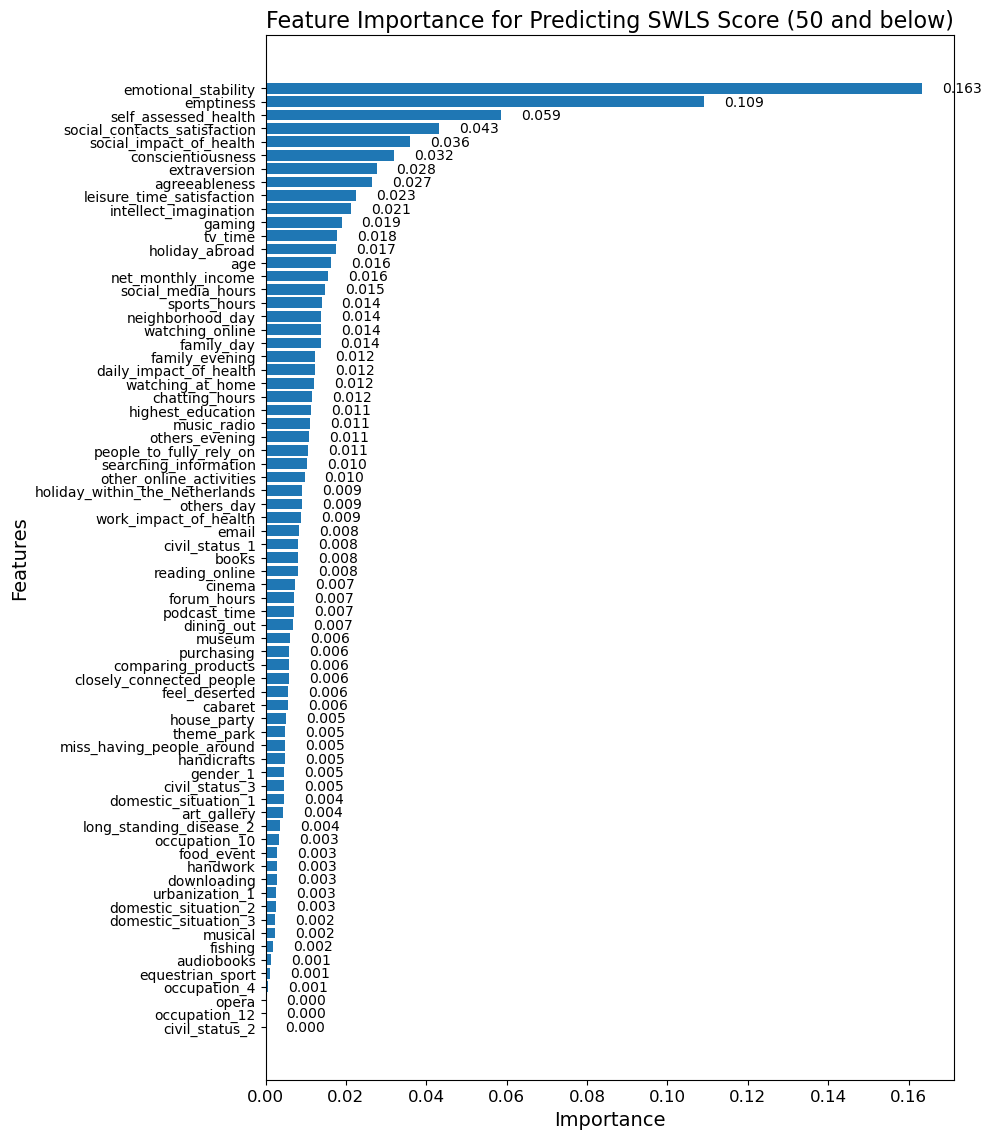

In [34]:
# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 11.5))  # Adjust size for vertical space
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')  # Default color retained
plt.gca().invert_yaxis()  # Place the most important feature at the top
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance for Predicting SWLS Score (50 and below)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)  # Adjust label font size

# Add numerical labels for each bar
for bar, score in zip(bars, importance_df['Importance']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2,
             f'{score:.3f}', va='center', fontsize=10, color='black')  # Black labels

plt.tight_layout()  # Automatically adjust layout to prevent overlap
plt.show()


## Random Forest with Hyperparameter Tuning:

In [25]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

estimator = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Hyperparameter tuning with GridSearchCV
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)
grid_search = GridSearchCV(estimator, param_grid, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
grid_search.fit(X_train_selected, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

best_estimator = RandomForestRegressor(**best_params, random_state=42)
best_estimator.fit(X_train_selected, y_train)

# Train set estimation
train_r2 = r2_score(y_train, best_estimator.predict(X_train_selected))
train_mae = mean_absolute_error(y_train, best_estimator.predict(X_train_selected))
train_rmse = root_mean_squared_error(y_train, best_estimator.predict(X_train_selected))

# Test set estimation
test_r2 = r2_score(y_test, best_estimator.predict(X_test_selected))
test_mae = mean_absolute_error(y_test, best_estimator.predict(X_test_selected))
test_rmse = root_mean_squared_error(y_test, best_estimator.predict(X_test_selected))

cv_results = grid_search.cv_results_
print("\nGridSearchCV results:")
print(f"Best mean cross-validation R² score: {grid_search.best_score_}")

print("\nTraining R² Score:", train_r2)
print("Training MAE Score:", train_mae)
print("Training RMSE Score:", train_rmse)

print("\nTest R² Score:", test_r2)
print("Test MAE Score:", test_mae)
print("Test RMSE Score:", test_rmse)

Best parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

GridSearchCV results:
Best mean cross-validation R² score: 0.37793258799096

Training R² Score: 0.8789675720662656
Training MAE Score: 1.4419636902439366
Training RMSE Score: 1.94493079824576

Test R² Score: 0.4178454771759589
Test MAE Score: 3.34581685121048
Test RMSE Score: 4.2976687285269675


## LASSO Regression with Hyperparameter Tuning

In [26]:
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

lasso = Lasso(random_state=42)

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]  
}

# Hyperparameter tuning with GridSearchCV
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)
grid_search = GridSearchCV(lasso, param_grid, scoring='r2', cv=cv, n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

best_lasso = Lasso(alpha=best_alpha, random_state=42)

r2_scores = cross_val_score(best_lasso, X_train_selected, y_train, cv=cv, scoring='r2')
mae_scores = cross_val_score(best_lasso, X_train_selected, y_train, cv=cv, scoring='neg_mean_absolute_error')
rmse_scores = cross_val_score(best_lasso, X_train_selected, y_train, cv=cv, scoring='neg_root_mean_squared_error')

print("Cross-validation R² scores:", r2_scores)
print("Mean cross-validation R² score:", np.mean(r2_scores))

print("Cross-validation MAE scores:", -mae_scores)  
print("Mean cross-validation MAE score:", -np.mean(mae_scores))

print("Cross-validation RMSE scores:", -rmse_scores)  
print("Mean cross-validation RMSE score:", -np.mean(rmse_scores))

best_lasso.fit(X_train_selected, y_train)

# Train set estimation
train_r2 = r2_score(y_train, best_lasso.predict(X_train_selected))
train_mae = mean_absolute_error(y_train, best_lasso.predict(X_train_selected))
train_rmse = root_mean_squared_error(y_train, best_lasso.predict(X_train_selected))

# Test set estimation
test_r2 = r2_score(y_test, best_lasso.predict(X_test_selected))
test_mae = mean_absolute_error(y_test, best_lasso.predict(X_test_selected))
test_rmse = root_mean_squared_error(y_test, best_lasso.predict(X_test_selected))   # 手动计算 RMSE

print("\nTraining R² Score:", train_r2)
print("Training MAE Score:", train_mae)
print("Training RMSE Score:", train_rmse)

print("\nTest R² Score:", test_r2)
print("Test MAE Score:", test_mae)
print("Test RMSE Score:", test_rmse)


Best alpha: 0.01
Cross-validation R² scores: [0.41522611 0.41414655 0.45742438 0.36300893 0.32410397 0.31900828
 0.40948028 0.42897627 0.412951   0.46879132 0.45325898 0.22796388
 0.43347608 0.41628781 0.42063582 0.42469226 0.40242667 0.33971507
 0.44009009 0.47906002 0.48923722 0.4772121  0.30861615 0.22623475
 0.42976179]
Mean cross-validation R² score: 0.3992714311167985
Cross-validation MAE scores: [3.57487039 3.11386488 3.30635441 3.49674396 3.39102311 3.60773622
 3.33599022 3.42124754 3.51154837 2.89936745 3.31171518 3.47433149
 3.21520064 3.64856049 3.20893542 3.16753551 3.37346505 3.46059282
 3.4093917  3.13130059 3.35200185 3.20042704 3.32865475 3.55027495
 3.37331957]
Mean cross-validation MAE score: 3.3545781444304468
Cross-validation RMSE scores: [4.56302705 4.01435665 4.20013101 4.59838454 4.27889299 4.59689157
 4.2057553  4.49965512 4.47482576 3.68518602 4.25497561 4.37705123
 4.17873089 4.62762176 4.20369258 4.05297329 4.45276788 4.43261981
 4.3699954  3.98696667 4.26616

## Multiple Linear Regression

In [27]:
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

estimator = LinearRegression()

# Repeated Cross Validation
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

r2_scores = cross_val_score(estimator, X_train_selected, y_train, cv=cv, scoring='r2')
mae_scores = cross_val_score(estimator, X_train_selected, y_train, cv=cv, scoring='neg_mean_absolute_error')
rmse_scores = cross_val_score(estimator, X_train_selected, y_train, cv=cv, scoring='neg_root_mean_squared_error')

print("Cross-validation R² scores:", r2_scores)
print("Mean cross-validation R² score:", np.mean(r2_scores))

print("Cross-validation MAE scores:", -mae_scores)  
print("Mean cross-validation MAE score:", -np.mean(mae_scores))

print("Cross-validation RMSE scores:", -rmse_scores)  
print("Mean cross-validation RMSE score:", -np.mean(rmse_scores))

estimator.fit(X_train_selected, y_train)

# Train set estimation
train_r2 = r2_score(y_train, estimator.predict(X_train_selected))
train_mae = mean_absolute_error(y_train, estimator.predict(X_train_selected))
train_rmse = root_mean_squared_error(y_train, estimator.predict(X_train_selected))

# Test set estimation
test_r2 = r2_score(y_test, estimator.predict(X_test_selected))
test_mae = mean_absolute_error(y_test, estimator.predict(X_test_selected))
test_rmse = root_mean_squared_error(y_test, estimator.predict(X_test_selected))

print("\nTraining R² Score:", train_r2)
print("Training MAE Score:", train_mae)
print("Training RMSE Score:", train_rmse)

print("\nTest R² Score:", test_r2)
print("Test MAE Score:", test_mae)
print("Test RMSE Score:", test_rmse)


Cross-validation R² scores: [0.40666325 0.42079268 0.44988878 0.36179635 0.32590788 0.31040198
 0.39224629 0.43285233 0.3994757  0.47161163 0.43184123 0.20916762
 0.43069456 0.40756602 0.41774809 0.41391448 0.390521   0.30833963
 0.44312531 0.47680238 0.49568179 0.47040182 0.28932739 0.22390623
 0.40535278]
Mean cross-validation R² score: 0.3914410883339817
Cross-validation MAE scores: [3.59265023 3.09049685 3.32820742 3.51022439 3.3872772  3.6327925
 3.37152437 3.40788531 3.51994843 2.89278882 3.3531537  3.50621674
 3.22312628 3.66056583 3.21951666 3.18393462 3.39098619 3.52523851
 3.4014264  3.12353083 3.33343707 3.22015695 3.35653687 3.55823316
 3.42231837]
Mean cross-validation MAE score: 3.3684869484451765
Cross-validation RMSE scores: [4.59631393 3.99152157 4.22919735 4.60275922 4.27317917 4.6258479
 4.26668526 4.48435747 4.5258926  3.67539023 4.33751615 4.43001343
 4.18897672 4.66206638 4.21415581 4.09076119 4.49690615 4.53671228
 4.35813463 3.99559664 4.23916787 4.19770675 4.31